**Import libraries**

In [4]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Load Datasets**

In [5]:
import tarfile
import pathlib
import os

# Define dataset URL
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Define download and extraction path
download_path = tf.keras.utils.get_file("flower_photos.tgz", origin=dataset_url, cache_dir=".", extract=False)

# Define extraction folder
extract_folder = "./flower_photos"

# Extract manually
if not os.path.exists(extract_folder):
    with tarfile.open(download_path, 'r:gz') as tar:
        tar.extractall(path=".")
    print("Dataset extracted successfully.")
else:
    print("Dataset already extracted.")

# Convert to pathlib Path object
data_dir = pathlib.Path(extract_folder)

# Check if dataset is correctly extracted
if data_dir.exists() and any(data_dir.iterdir()):
    print(f"Dataset directory: {data_dir}")

    # List all categories (subfolders)
    categories = [item.name for item in data_dir.iterdir() if item.is_dir()]
    print("Categories (flowers):", categories)
else:
    print("Dataset extraction failed or directory is empty.")


Dataset already extracted.
Dataset directory: flower_photos
Categories (flowers): ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [6]:
# Define the dataset directory
data_dir = pathlib.Path("C:/Users/USER/Tensor-Project/IMAGE_RECOGNITION-WITH-TENSORFLOW/flower_photos")

# Iterate through the items in the directory
for item in data_dir.iterdir():
    # Check if the item is a file and delete it if it's not a directory
    if item.is_file() and item.name == "LICENSE.txt":
        print(f"Removing file: {item.name}")
        os.remove(item)

# Verify the remaining categories
categories = [item.name for item in data_dir.iterdir() if item.is_dir()]
print("Remaining Categories (flowers):", categories)


Remaining Categories (flowers): ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


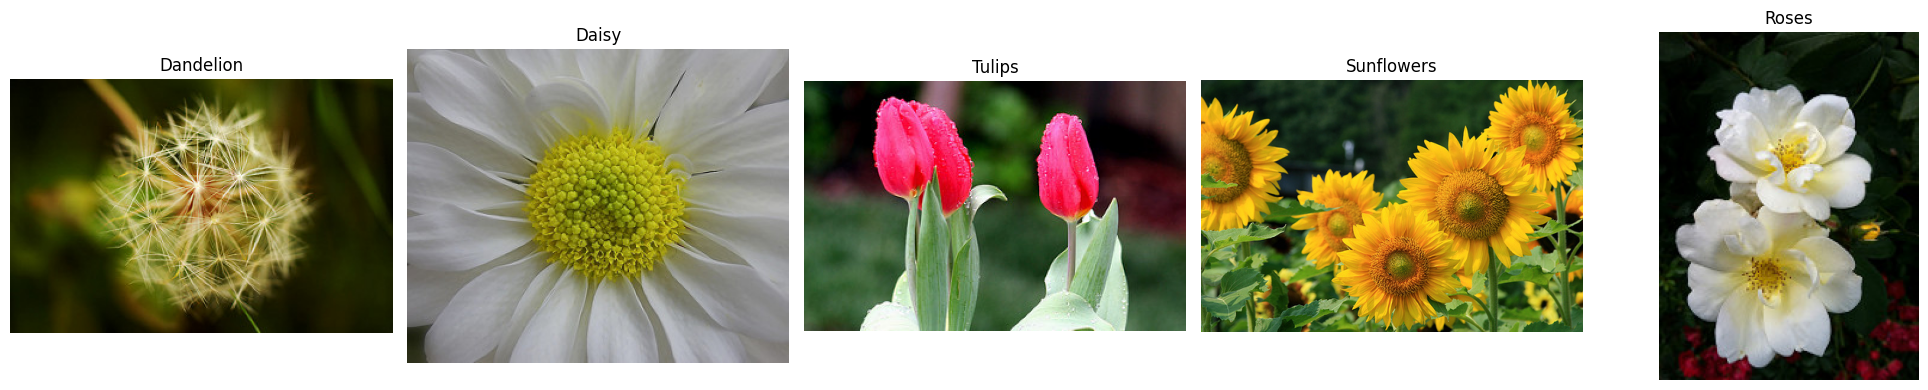

In [8]:
# Define the dataset directory
data_dir = pathlib.Path("C:/Users/USER/Tensor-Project/IMAGE_RECOGNITION-WITH-TENSORFLOW/flower_photos")

# List of flower categories
flower_categories = ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

# Create a figure with 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Loop through each flower category
for i, category in enumerate(flower_categories):
    # Get the path to the first image in the category
    images = list(data_dir.glob(f'{category}/*'))
    image_path = images[0]

    # Open the image using PIL
    img = PIL.Image.open(str(image_path))

    # Display the image in the subplot
    axs[i].imshow(img)
    axs[i].set_title(category.capitalize())
    axs[i].axis('off')

# Layout so plots do not overlap
plt.tight_layout()

plt.show()


**Training and Testing Model**
1. Training split

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2. Validation split

In [10]:
# Testing or Validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	validation_split=0.2,
	subset="validation",
	seed=123,
	image_size=(180,180),
	batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Datasets sizes

In [11]:
print(f"Train dataset size: {len(train_ds)} batches")
print(f"Validation dataset size: {len(val_ds)} batches")

Train dataset size: 92 batches
Validation dataset size: 23 batches


**Visualize Image Split**
1. Get Class Names

In [12]:
# This displays image names in alphabetical order.
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


2. Display Some Training Images

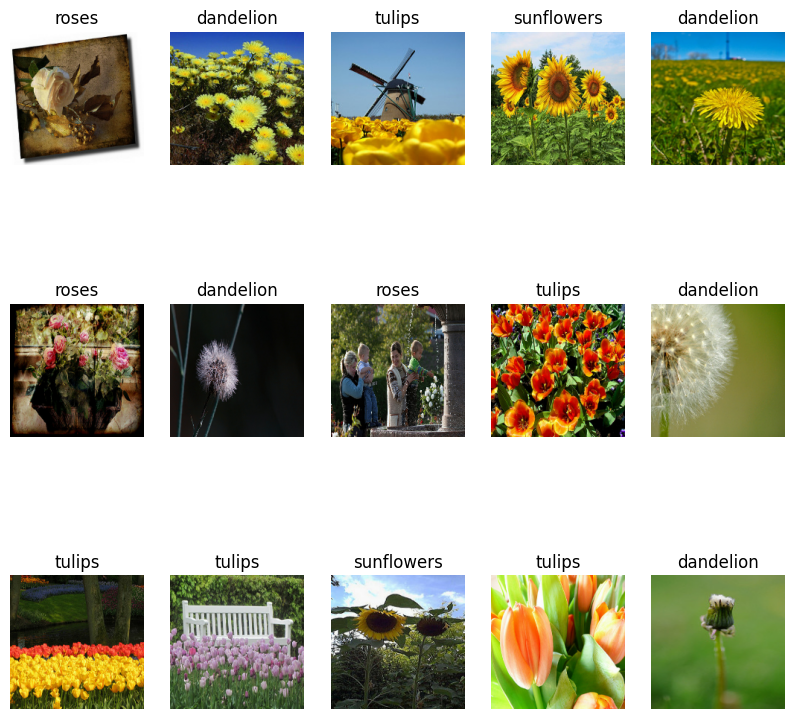

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


**Creating The Model**

In [14]:
num_classes = len(class_names)  # Number of output classes

model = Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Normalize pixel values to [0,1]

    layers.Conv2D(16, 3, padding='same', activation='relu'),  # 1st Conv layer
    layers.MaxPooling2D(),  # Pooling reduces feature map size

    layers.Conv2D(32, 3, padding='same', activation='relu'),  # 2nd Conv layer
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),  # 3rd Conv layer
    layers.MaxPooling2D(),

    layers.Flatten(),  # Convert 2D feature maps into a 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(num_classes)  # Output layer with `num_classes` neurons
])

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)      

In [16]:
#Training model using model.fit() to allow machine learn patterns
epochs=10
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/10


92/92 [==============================] - 65s 634ms/step - loss: 1.3813 - accuracy: 0.4155 - val_loss: 1.1522 - val_accuracy: 0.5463
Epoch 2/10
92/92 [==============================] - 53s 573ms/step - loss: 1.0058 - accuracy: 0.6032 - val_loss: 0.9729 - val_accuracy: 0.6022
Epoch 3/10
92/92 [==============================] - 67s 721ms/step - loss: 0.8459 - accuracy: 0.6788 - val_loss: 0.8633 - val_accuracy: 0.6567
Epoch 4/10
92/92 [==============================] - 56s 601ms/step - loss: 0.6385 - accuracy: 0.7531 - val_loss: 0.9120 - val_accuracy: 0.6526
Epoch 5/10
92/92 [==============================] - 54s 580ms/step - loss: 0.4394 - accuracy: 0.8406 - val_loss: 1.0756 - val_accuracy: 0.6390
Epoch 6/10
92/92 [==============================] - 53s 573ms/step - loss: 0.2649 - accuracy: 0.9077 - val_loss: 1.2021 - val_accuracy: 0.6471
Epoch 7/10
92/92 [==============================] - 61s 662ms/step - loss: 0.1642 - accuracy: 0.9455 - val_loss: 1.2781 - val_accuracy: 0.65

Visualizing results on training and testing datasets

Epoch 1/10
92/92 [==============================] - 55s 590ms/step - loss: 0.0159 - accuracy: 0.9980 - val_loss: 2.0094 - val_accuracy: 0.6635
Epoch 2/10
92/92 [==============================] - 58s 620ms/step - loss: 0.0177 - accuracy: 0.9959 - val_loss: 1.9587 - val_accuracy: 0.6431
Epoch 3/10
92/92 [==============================] - 54s 583ms/step - loss: 0.0231 - accuracy: 0.9942 - val_loss: 2.1131 - val_accuracy: 0.6390
Epoch 4/10
92/92 [==============================] - 63s 682ms/step - loss: 0.0111 - accuracy: 0.9980 - val_loss: 2.2357 - val_accuracy: 0.6540
Epoch 5/10
92/92 [==============================] - 59s 641ms/step - loss: 0.0262 - accuracy: 0.9952 - val_loss: 2.5471 - val_accuracy: 0.6580
Epoch 6/10
92/92 [==============================] - 70s 752ms/step - loss: 0.0894 - accuracy: 0.9772 - val_loss: 1.9578 - val_accuracy: 0.6512
Epoch 7/10
92/92 [==============================] - 67s 725ms/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 1.9042 - val_accuracy: 0.6471

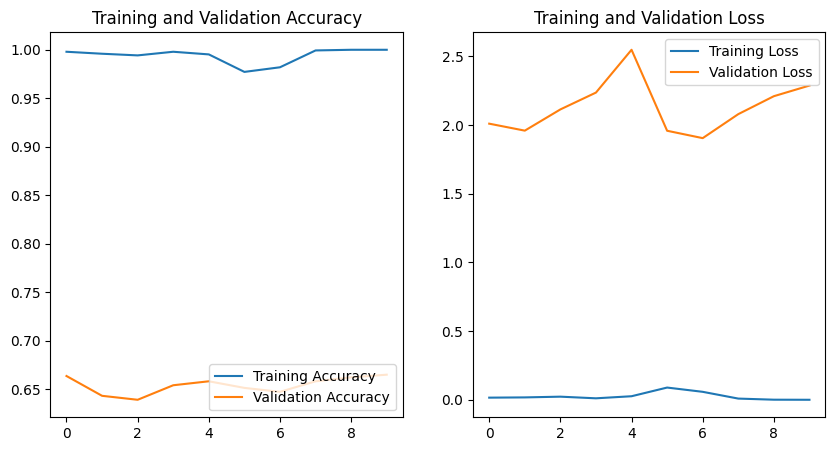

In [17]:
# Train the model and save history
epochs = 10  # Set number of epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot Accuracy & Loss
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

**Fine-Tune Hyperparameters**
1. Data Agumentation(prevent overfitting)

In [25]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

2. Use Transfer Learning (Pretrained Model)

In [26]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze layers (we'll fine-tune

3. Build a Fined-Tune Model

In [27]:
#We add new layers on top of the pre-trained model.
from tensorflow.keras import Sequential, layers, Model

global_avg_pooling = layers.GlobalAveragePooling2D()
dense_layer = layers.Dense(128, activation='relu')
dropout_layer = layers.Dropout(0.2)  # Helps prevent overfitting
output_layer = layers.Dense(num_classes, activation='softmax')

# Define new model
model = Sequential([
    data_augmentation,
    base_model,
    global_avg_pooling,
    dense_layer,
    dropout_layer,
    output_layer
])

4. Compile with Learning rate Scheduling

In [28]:
import tensorflow as tf

model.build(input_shape=(None, 180, 180, 3))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 6, 6, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 5)                

5. Train & Fine-Tune Model

In [29]:
#We first train only the top layers, then unfreeze the base model and retrain.

# Step 1: Train only the new layers
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

# Step 2: Unfreeze base model and fine-tune with a very small learning rate
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Fine-tune for additional epochs
history_finetune = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/5
92/92 [==============================] - 119s 1s/step - loss: 1.7394 - accuracy: 0.2623 - val_loss: 1.5116 - val_accuracy: 0.3542
Epoch 2/5
92/92 [==============================] - 89s 965ms/step - loss: 1.4500 - accuracy: 0.3856 - val_loss: 1.3900 - val_accuracy: 0.4305
Epoch 3/5
92/92 [==============================] - 90s 975ms/step - loss: 1.3466 - accuracy: 0.4482 - val_loss: 1.3287 - val_accuracy: 0.4796
Epoch 4/5
92/92 [==============================] - 90s 965ms/step - loss: 1.2930 - accuracy: 0.4779 - val_loss: 1.2969 - val_accuracy: 0.4741
Epoch 5/5
92/92 [==============================] - 89s 963ms/step - loss: 1.2251 - accuracy: 0.5279 - val_loss: 1.2727 - val_accuracy: 0.4850
Epoch 1/10
92/92 [==============================] - 385s 4s/step - loss: 1.3239 - accuracy: 0.4636 - val_loss: 1.1089 - val_accuracy: 0.5668
Epoch 2/10
92/92 [==============================] - 321s 3s/step - loss: 0.9012 - accuracy: 0.6873 - val_loss: 0.9322 - val_accuracy: 0.6362
Epoch 3/10

6. Evaluate & Visualize Model Performance

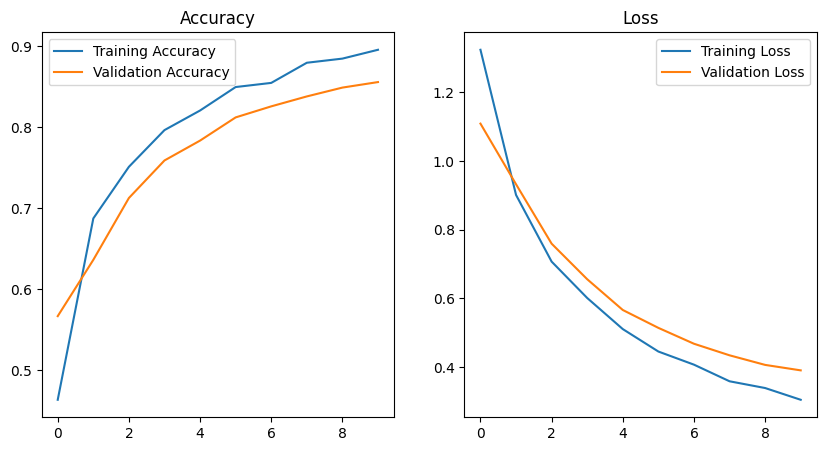

In [30]:
#Plot the results again to check if overfitting is reduced.
acc = history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy']
loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']
epochs_range = range(len(acc))

#Accuracy Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

#Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict
y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, _ in val_ds])
y_true = np.concatenate([y.numpy() for _, y in val_ds])

print(classification_report(y_true, y_pred, target_names=class_names))

1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

       daisy       0.21      0.19      0.20       129
   dandelion       0.21      0.24      0.23       176
       roses       0.16      0.11      0.13       120
  sunflowers       0.18      0.18      0.18       152
      tulips       0.21      0.25      0.23       157

    accuracy                           0.20       734
   macro avg       0.20      0.19      0.19       734
weighted avg       0.20      0.20      0.20       734



In [32]:
model.save('fine_tuned_flower_model.h5')

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
